<a href="https://colab.research.google.com/github/Ayryslaine/imersao_alura_dados_2026/blob/main/imersao_python_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 01 - Explore Dados com Pandas

In [271]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [210]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [211]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


No head pode informar a quantidade de linhas que deseja mostrar:

In [212]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


o info() traz informações sobre nossa base de dados:

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


Estatística descritiva:

In [214]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


Tamanho da base:

In [215]:
df.shape

(133349, 11)

Primeiro valor: quantidade de linhas, Segundo valor: Número de colunas

In [216]:
linhas, colunas = df.shape[0], df.shape[1]

print("Linhas: ", linhas)
print("Colunas: ", colunas)

Linhas:  133349
Colunas:  11


Listar o nome das colunas:

In [217]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

Renomear o nome das colunas:

In [218]:
df.rename(columns = {'work_year': 'ano',
            'experience_level': 'nivel_experiencia',
            'employment_type': 'contrato',
            'job_title': 'cargo',
            'salary': 'salario',
            'salary_currency': 'moeda_salario',
            'salary_in_usd': 'salario_em_usd',
            'employee_residence': 'residencia',
            'remote_ratio': 'remoto',
            'company_location': 'localizacao_empresa',
            'company_size': 'tamanho_empresa'}, inplace = True)

df.columns

Index(['ano', 'nivel_experiencia', 'contrato', 'cargo', 'salario',
       'moeda_salario', 'salario_em_usd', 'residencia', 'remoto',
       'localizacao_empresa', 'tamanho_empresa'],
      dtype='object')

Analisar as colunas categóricas:

In [219]:
df_experiencia = df['nivel_experiencia'].value_counts()

df_experiencia.name = 'frequência'

df_experiencia

,frequência
nivel_experiencia,
SE,77241
MI,40465
EN,12443
EX,3200


In [220]:
df_contrato = df['contrato'].value_counts()

df_contrato.name = 'frequência'

df_contrato

,frequência
contrato,
FT,132563
CT,394
PT,376
FL,16


In [221]:
df_remoto = df['remoto'].value_counts()

df_remoto.name = 'frequência'

df_remoto

,frequência
remoto,
0,105312
100,27718
50,319


0 - Presencial/ 100 - remoto/ 50 - híbrido

In [222]:
df_tamanho_empresa = df['tamanho_empresa'].value_counts()

df_tamanho_empresa.name = 'frequência'

df_tamanho_empresa

,frequência
tamanho_empresa,
M,129561
L,3574
S,214


Renomear os dados:

In [223]:
substituir_nivel = {'SE': 'Senior', 'MI': 'Pleno', 'EN': 'Junior', 'EX': 'Executive'}

df['nivel_experiencia'] = df['nivel_experiencia'].replace(substituir_nivel)

df['nivel_experiencia'].value_counts()

,count
nivel_experiencia,
Senior,77241
Pleno,40465
Junior,12443
Executive,3200


In [224]:
substituir = {'FT': 'Tempo Integral', 'PT': 'Tempo parcial', 'FL': 'Freelance', 'CT': 'Contrato'}

df['contrato'] = df['contrato'].replace(substituir)

df['contrato'].value_counts()

,count
contrato,
Tempo Integral,132563
Contrato,394
Tempo parcial,376
Freelance,16


In [225]:
substituir_tamanho_empresa = {'S': 'Pequena', 'M': 'Media', 'L': 'Grande'}

df['tamanho_empresa'] = df['tamanho_empresa'].replace(substituir_tamanho_empresa)

df['tamanho_empresa'].value_counts()

,count
tamanho_empresa,
Media,129561
Grande,3574
Pequena,214


In [226]:
substituir_remoto = {0: 'Presencial', 50: 'Hibrido', 100: 'Remoto'}

df['remoto'] = df['remoto'].replace(substituir_remoto)

df['remoto'].value_counts()

,count
remoto,
Presencial,105312
Remoto,27718
Hibrido,319


Verificando o dataframe:

In [227]:
df.head(10)

,ano,nivel_experiencia,contrato,cargo,salario,moeda_salario,salario_em_usd,residencia,remoto,localizacao_empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media
5,2025.0,Junior,Tempo Integral,Data Engineer,80000,USD,80000,US,Presencial,US,Media
6,2025.0,Senior,Tempo Integral,Data Scientist,185000,USD,185000,US,Presencial,US,Media
7,2025.0,Senior,Tempo Integral,Data Scientist,148000,USD,148000,US,Presencial,US,Media
8,2025.0,Pleno,Tempo Integral,Data Scientist,135000,USD,135000,CA,Presencial,CA,Media
9,2025.0,Pleno,Tempo Integral,Data Scientist,108000,USD,108000,CA,Presencial,CA,Media


Utilizando describe para dados categóricos:

In [228]:
df.describe(include = 'object')

,nivel_experiencia,contrato,cargo,moeda_salario,residencia,remoto,localizacao_empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Media
freq,77241,132563,17314,126140,119579,105312,119641,129561


# Aula 02 - Aprenda a Limpar e preparador os dados

verificar se tem valores nulos:

In [229]:
df.isnull()

,ano,nivel_experiencia,contrato,cargo,salario,moeda_salario,salario_em_usd,residencia,remoto,localizacao_empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


contagem de valores nulos:

In [230]:
df.isnull().sum()

,0
ano,10
nivel_experiencia,0
contrato,0
cargo,0
salario,0
moeda_salario,0
salario_em_usd,0
residencia,0
remoto,0
localizacao_empresa,0


Verificar os anos que existem dentro da coluna ano:

In [231]:
df['ano'].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

Exibir as linhas que estão nulas:

In [232]:
df[df.isnull().any(axis=1)]

,ano,nivel_experiencia,contrato,cargo,salario,moeda_salario,salario_em_usd,residencia,remoto,localizacao_empresa,tamanho_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Media
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Media
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Media
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Media
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Media
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Media
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Media
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Hibrido,US,Grande


any() verifica se há algum valor True em cada linha ou coluna.

axis=1 especifica que a verificação deve ser feita por linha.

# Criação de df para preenchimento de valores nulos (aprendendo)

com média e mediana

In [233]:
df_salarios = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Diana', 'Eduardo', 'Ayryslaine'],
    'salario': [4000, np.nan, 3500, np.nan, 5000, 6000]
})

# Preencher com a média salarial
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))

# Preencher com a mediana salarial
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.0,4000.0
1,Bruno,NaN,4625.0,4500.0
2,Carlos,3500.0,3500.0,3500.0
3,Diana,NaN,4625.0,4500.0
4,Eduardo,5000.0,5000.0,5000.0
5,Ayryslaine,6000.0,6000.0,6000.0


com o valor anterior - Usar ffill (forward fill)

In [234]:
df_temperaturas = pd.DataFrame({
    'dia': ['Seg', 'Ter', 'Qua', 'Qui', 'Sex'],
    'temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['Preenchido_ffill'] = df_temperaturas['temperatura'].ffill()

df_temperaturas

,dia,temperatura,Preenchido_ffill
0,Seg,30.0,30.0
1,Ter,NaN,30.0
2,Qua,NaN,30.0
3,Qui,28.0,28.0
4,Sex,27.0,27.0


com o valor posterior - Usar bfill (backward fill)

In [235]:
df_temperaturas = pd.DataFrame({
    'dia': ['Seg', 'Ter', 'Qua', 'Qui', 'Sex'],
    'temperatura': [30, np.nan, np.nan, 28, 27]
})

df_temperaturas['Preenchido_bfill'] = df_temperaturas['temperatura'].bfill()

df_temperaturas

,dia,temperatura,Preenchido_bfill
0,Seg,30.0,30.0
1,Ter,NaN,28.0
2,Qua,NaN,28.0
3,Qui,28.0,28.0
4,Sex,27.0,27.0


com valor fixo

In [236]:
df_cidades = pd.DataFrame({
    'nome': ['Ana', 'Bruno', 'Carlos', 'Diana', 'Eduardo'],
    'cidade': ['São Paulo', np.nan, 'Curitiba', np.nan, 'Salvador']
})

df_cidades['cidade'] = df_cidades['cidade'].fillna('Não informado')

df_cidades

,nome,cidade
0,Ana,São Paulo
1,Bruno,Não informado
2,Carlos,Curitiba
3,Diana,Não informado
4,Eduardo,Salvador


# Remover os salários (pois são poucos dados)

Remoção dos dados:

In [237]:
df_limpo = df.dropna()

In [238]:
df_limpo.isnull().sum()

,0
ano,0
nivel_experiencia,0
contrato,0
cargo,0
salario,0
moeda_salario,0
salario_em_usd,0
residencia,0
remoto,0
localizacao_empresa,0


Visualizando nosso df:

In [239]:
display(df_limpo)

,ano,nivel_experiencia,contrato,cargo,salario,moeda_salario,salario_em_usd,residencia,remoto,localizacao_empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media
...,...,...,...,...,...,...,...,...,...,...,...
133344,2020.0,Senior,Tempo Integral,Data Scientist,412000,USD,412000,US,Remoto,US,Grande
133345,2021.0,Pleno,Tempo Integral,Principal Data Scientist,151000,USD,151000,US,Remoto,US,Grande
133346,2020.0,Junior,Tempo Integral,Data Scientist,105000,USD,105000,US,Remoto,US,Pequena
133347,2020.0,Junior,Contrato,Business Data Analyst,100000,USD,100000,US,Remoto,US,Grande


O ano está como float, precisamos ajeitar, há duas formas:

Primeira forma:

In [240]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))

df_limpo

,ano,nivel_experiencia,contrato,cargo,salario,moeda_salario,salario_em_usd,residencia,remoto,localizacao_empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Media
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Media
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Media
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Media
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Media
...,...,...,...,...,...,...,...,...,...,...,...
133344,2020,Senior,Tempo Integral,Data Scientist,412000,USD,412000,US,Remoto,US,Grande
133345,2021,Pleno,Tempo Integral,Principal Data Scientist,151000,USD,151000,US,Remoto,US,Grande
133346,2020,Junior,Tempo Integral,Data Scientist,105000,USD,105000,US,Remoto,US,Pequena
133347,2020,Junior,Contrato,Business Data Analyst,100000,USD,100000,US,Remoto,US,Grande


Segunda forma:

In [241]:
df_limpo['ano'].astype('int64')

,ano
0,2025
1,2025
2,2025
3,2025
4,2025
...,...
133344,2020
133345,2021
133346,2020
133347,2020


# Aula 03 - Crie gráficos e conte histórias com dados

Gráfico com a biblioteca pandas:

<Axes: title={'center': 'Distribuição de nível de experiência'}, xlabel='nivel_experiencia'>

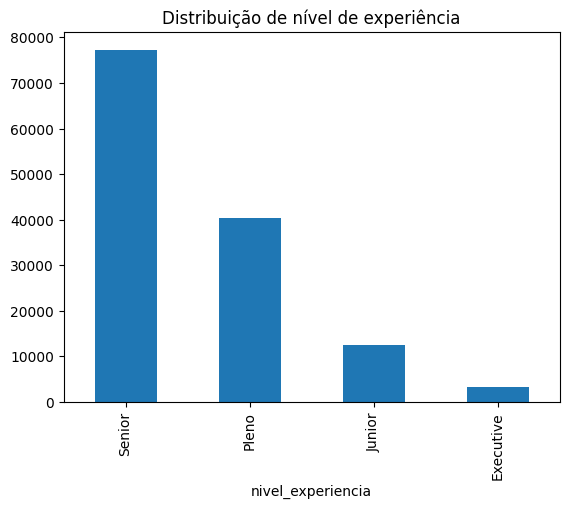

In [242]:
df['nivel_experiencia'].value_counts().plot(kind='bar', title = 'Distribuição de nível de experiência')

Gráfico com o seaborn:

<Axes: xlabel='nivel_experiencia', ylabel='salario_em_usd'>

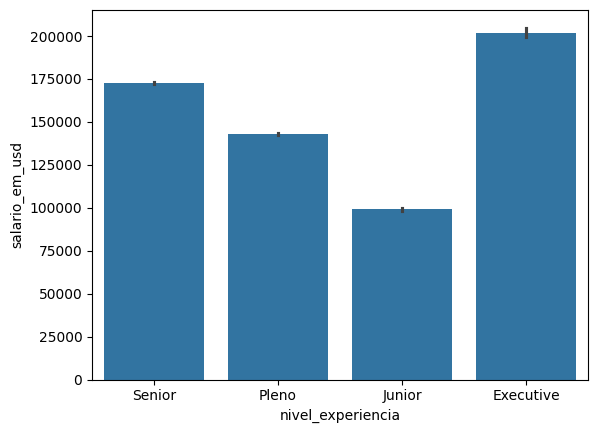

In [243]:
sns.barplot(data = df_limpo, x= 'nivel_experiencia', y= 'salario_em_usd')

Gráfico com seaborn e matplotlib:

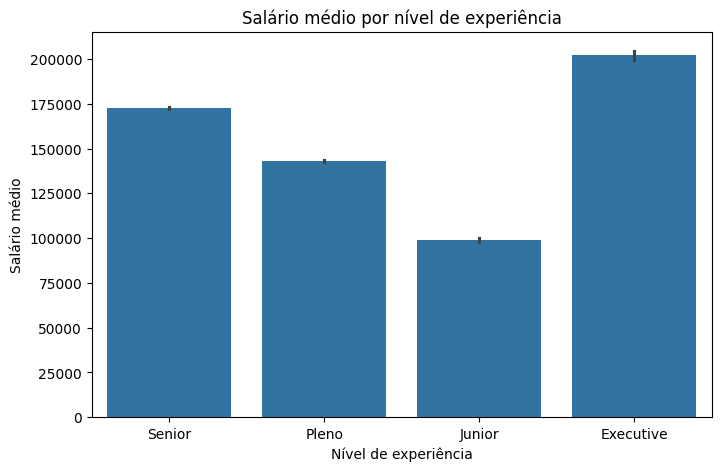

In [244]:
plt.figure(figsize=(8,5))
sns.barplot(data = df_limpo, x= 'nivel_experiencia', y= 'salario_em_usd')
plt.title('Salário médio por nível de experiência')
plt.xlabel('Nível de experiência')
plt.ylabel('Salário médio')
plt.show()

# Group by

In [248]:
df_limpo.groupby('nivel_experiencia')['salario_em_usd'].mean().sort_values(ascending=False)

,salario_em_usd
nivel_experiencia,
Executive,202027.667813
Senior,172850.838301
Pleno,143044.845979
Junior,99034.963267


In [252]:
ordem = df_limpo.groupby('nivel_experiencia')['salario_em_usd'].mean().sort_values(ascending=False).index

ordem

Index(['Executive', 'Senior', 'Pleno', 'Junior'], dtype='object', name='nivel_experiencia')

O indez está extraindo apenas os rótulos (nomes) do resultado, jogando fora os valores numéricos.

O .index pega só os nomes dos grupos, ou seja, os níveis de experiência, na ordem que eles estão depois da ordenação.

✅ Extrai os nomes já ordenados, sem os números

# Gráfico em ordem

Gráfico em ordem do maior para menor:

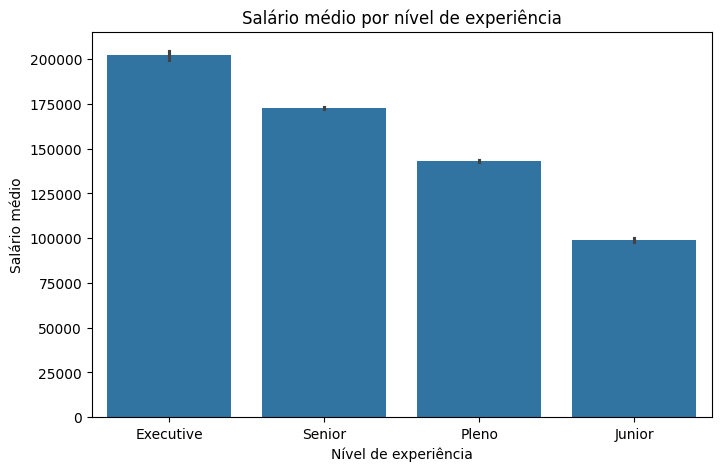

In [264]:
plt.figure(figsize=(8,5))
sns.barplot(data = df_limpo, x= 'nivel_experiencia', y= 'salario_em_usd', order = ordem)
plt.title('Salário médio por nível de experiência')
plt.xlabel('Nível de experiência')
plt.ylabel('Salário médio')
plt.show()

# Outros tipos de gráfico

Gráfico de histograma:

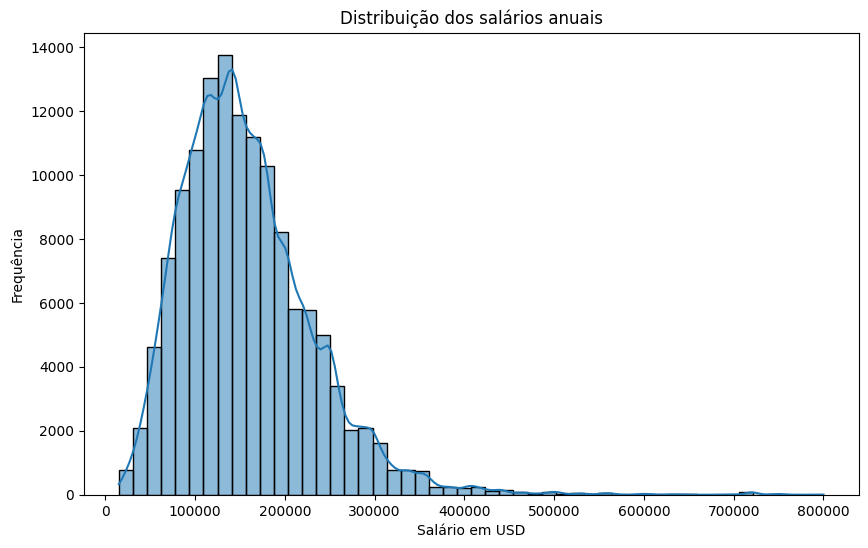

In [259]:
plt.figure(figsize=(10,6))
sns.histplot(df_limpo['salario_em_usd'], bins=50, kde=True)
plt.title('Distribuição dos salários anuais')
plt.xlabel('Salário em USD')
plt.ylabel('Frequência')
plt.show()

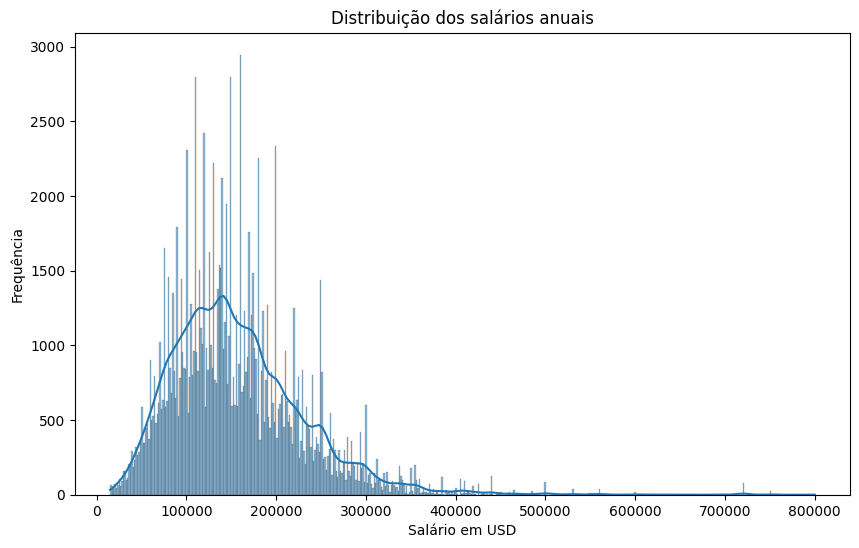

In [260]:
plt.figure(figsize=(10,6))
sns.histplot(df_limpo['salario_em_usd'], bins=500, kde=True)
plt.title('Distribuição dos salários anuais')
plt.xlabel('Salário em USD')
plt.ylabel('Frequência')
plt.show()

bins = intervalo entre as barras geradas pelo gráfico

Não é uma distribuição normal, pois não está distribuído em maior quantidade exatamente no meio

Gráfico de boxplot:

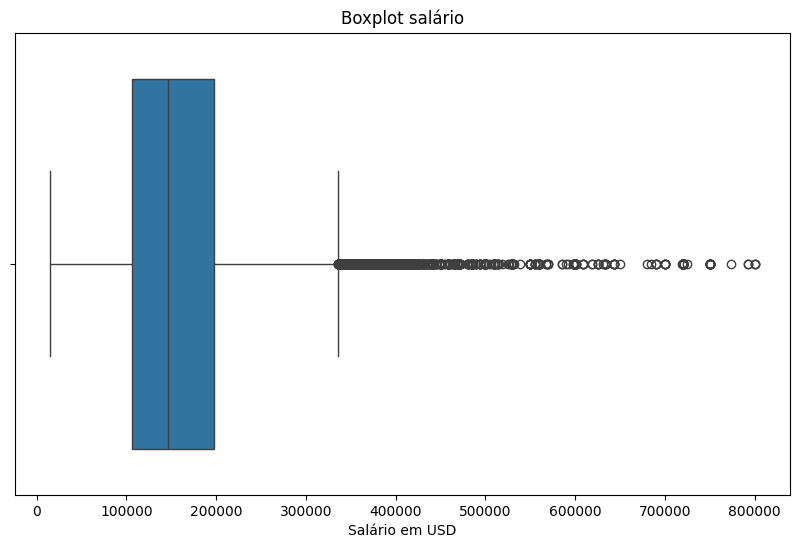

In [262]:
plt.figure(figsize=(10,6))
sns.boxplot(x= df_limpo['salario_em_usd'])
plt.title('Boxplot salário')
plt.xlabel('Salário em USD')
#plt.ylabel() só temos o eixo x
plt.show()

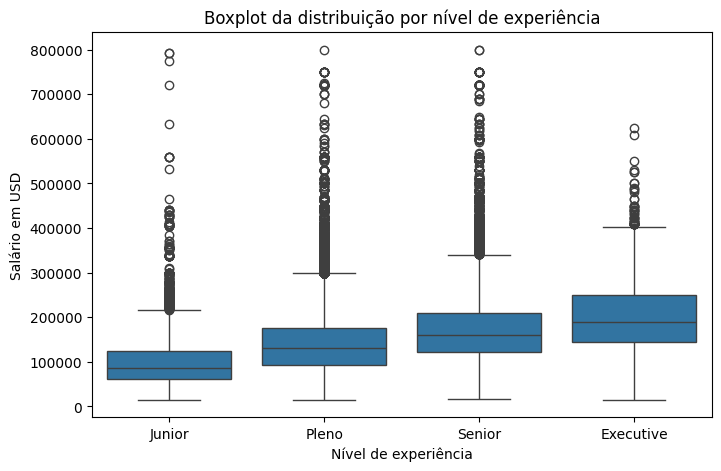

In [267]:
ordem_nivel = ['Junior', 'Pleno', 'Senior', 'Executive']

plt.figure(figsize=(8,5))
sns.boxplot(data = df_limpo, x= 'nivel_experiencia', y= 'salario_em_usd', order = ordem_nivel)
plt.title('Boxplot da distribuição por nível de experiência')
plt.xlabel('Nível de experiência')
plt.ylabel('Salário em USD')
plt.show()

Mudando as cores:

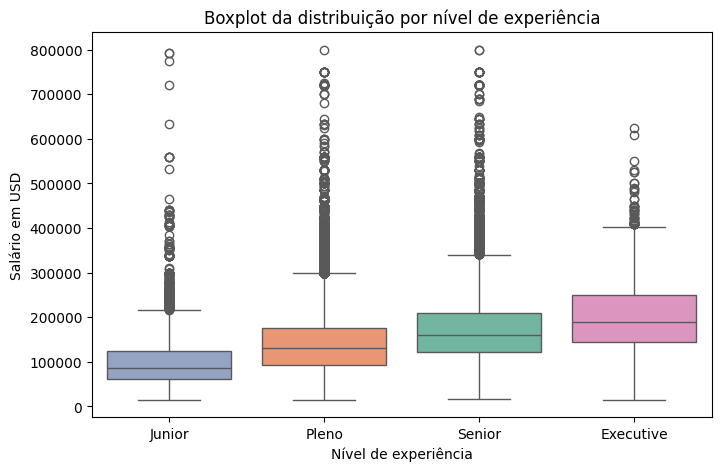

In [269]:
ordem_nivel = ['Junior', 'Pleno', 'Senior', 'Executive']

plt.figure(figsize=(8,5))
sns.boxplot(data = df_limpo, x= 'nivel_experiencia', y= 'salario_em_usd', order = ordem_nivel, palette= 'Set2', hue= 'nivel_experiencia')
plt.title('Boxplot da distribuição por nível de experiência')
plt.xlabel('Nível de experiência')
plt.ylabel('Salário em USD')
plt.show()

gráfico com o plotly:

In [272]:
media_salario = df.groupby('nivel_experiencia')['salario_em_usd'].mean().reset_index()

fig = px.bar(media_salario, x='nivel_experiencia', y='salario_em_usd',
             title='Salário Médio por Nível de experiência',
             labels={'nivel_experiencia': 'Nível de experiência', 'salario_em_usd': 'Salário Médio (USD)'},
             color='nivel_experiencia')
fig.show()

Gráfico de pizza:

In [275]:
contagem_remoto = df_limpo['remoto'].value_counts().reset_index()
contagem_remoto.columns = ['Tipo_trabalho', 'Quantidade']
contagem_remoto

fig = px.pie(contagem_remoto,
             names = 'Tipo_trabalho',
             values = 'Quantidade',
             title='Proporção dos tipos de trabalho')
fig.show()

In [276]:
contagem_remoto = df_limpo['remoto'].value_counts().reset_index()
contagem_remoto.columns = ['Tipo_trabalho', 'Quantidade']
contagem_remoto

fig = px.pie(contagem_remoto,
             names = 'Tipo_trabalho',
             values = 'Quantidade',
             title='Proporção dos tipos de trabalho',
             hole= 0.5)
fig.show()

In [278]:
contagem_remoto = df_limpo['remoto'].value_counts().reset_index()
contagem_remoto.columns = ['Tipo_trabalho', 'Quantidade']
contagem_remoto

fig = px.pie(contagem_remoto,
             names = 'Tipo_trabalho',
             values = 'Quantidade',
             title='Proporção dos tipos de trabalho',
             hole= 0.5)

fig.update_traces(textinfo = 'percent+label')
fig.show()

# Desafio

In [279]:
df_limpo.columns

Index(['ano', 'nivel_experiencia', 'contrato', 'cargo', 'salario',
       'moeda_salario', 'salario_em_usd', 'residencia', 'remoto',
       'localizacao_empresa', 'tamanho_empresa'],
      dtype='object')

In [281]:
df_data_scientist = df_limpo[df_limpo['cargo'] == 'Data Scientist']

media_salario_pais_ds = df_data_scientist.groupby('residencia')['salario_em_usd'].mean().reset_index()

media_salario_pais_ds.columns = ['País', 'Salário']

fig = px.bar(media_salario_pais_ds, x='País', y='Salário',
             title='Salário Médio de Data Scientist por país',
             labels={'País': 'País', 'Salário': 'Salário Médio (USD)'},
             color='País')
fig.show()